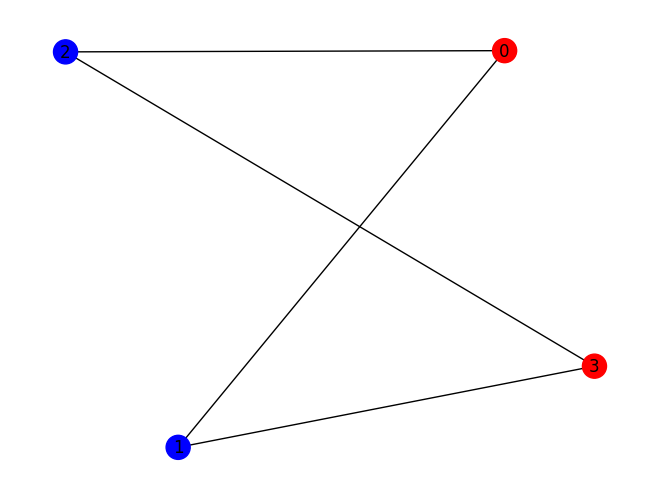

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def coloriage_sommets_graphe(graphe):
    color_map = {}
    for sommet in graphe:
        if sommet not in color_map:
            couleurs_adjacentes = {color_map[adj] for adj in graphe[sommet] if adj in color_map}
            color_map[sommet] = 0 if 0 not in couleurs_adjacentes else 1

    return color_map

# Exemple de graphe
graphe = {0: [1, 2], 1: [0, 3], 2: [0, 3], 3: [1, 2]}
color_map = coloriage_sommets_graphe(graphe)

# Dessin du graphe
G = nx.Graph(graphe)
pos = nx.spring_layout(G)
colors = ['red' if color_map[node] == 0 else 'blue' for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True)

plt.show()

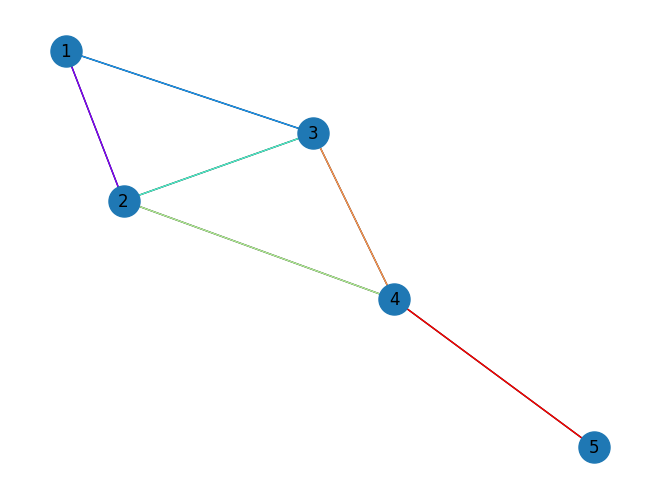

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def greedy_edge_coloring(graph):
    colors = {}
    available_colors = set(range(len(graph.edges())))
    
    for edge in graph.edges():
        neighbor_colors = {colors.get(neighbor, None) for neighbor in graph.edges(edge[0])} | {colors.get(neighbor, None) for neighbor in graph.edges(edge[1])}
        
        # Find the smallest available color not used by neighbors
        color = next(iter(available_colors - neighbor_colors), None)
        
        if color is not None:
            colors[edge] = color
            available_colors.remove(color)
        else:
            # If no available color, assign a new color
            colors[edge] = len(colors)
    
    return colors

G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]
G.add_edges_from(edges)

edge_colors = greedy_edge_coloring(G)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=edge_colors.keys(), edge_color=list(edge_colors.values()), edge_cmap=plt.cm.rainbow)

plt.show()
